In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import scipy as sp

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [92]:
#Importation des données
data = pd.read_csv('data.csv')

In [93]:
#Set l'index sur les pays
data.set_index('Zone',inplace = True)

In [94]:
data.drop(['Unnamed: 0'], axis = 1,inplace = True)
data.head()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,auto_suffisance,Population totale,PIB,Stabilité politique,dependance_import
Zone,,,,,,,,,,
Afghanistan,57.0,0.0,29.0,55.0,28.0,50.91,15.15,4.24,-2.80,0.53
Afrique du Sud,2118.0,63.0,514.0,2035.0,1667.0,78.82,15.80,8.57,-0.28,0.25
Albanie,47.0,0.0,38.0,47.0,13.0,27.66,11.49,3.70,0.38,0.81
Algérie,277.0,0.0,2.0,264.0,275.0,104.17,15.34,7.41,-0.92,0.01
Allemagne,1739.0,646.0,842.0,1609.0,1514.0,53.95,16.33,11.85,0.59,0.52


In [95]:
print(data.shape)

#nombre d'observations
n = data.shape[0]
#nombre de variables
p = data.shape[1]

(166, 10)


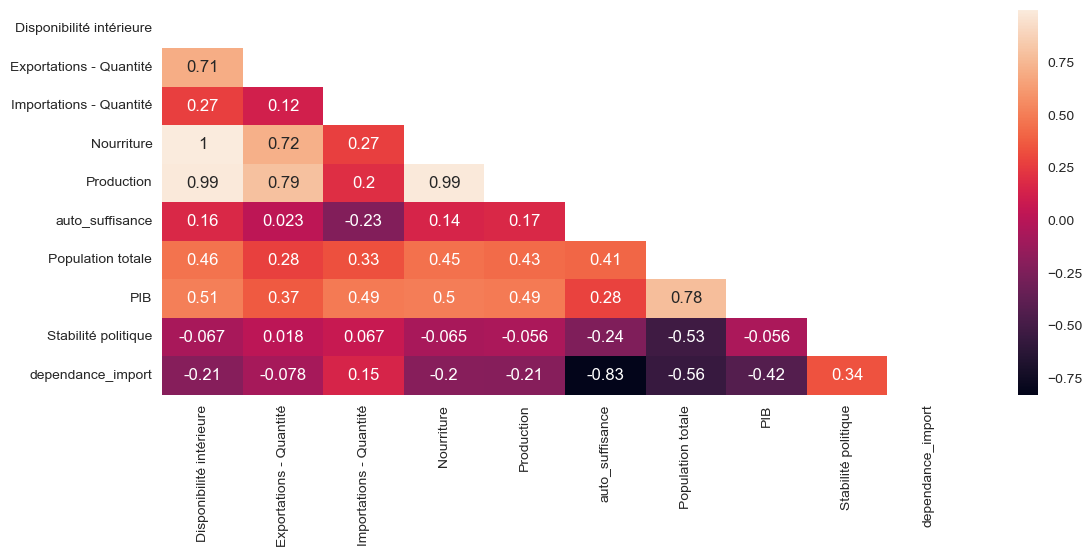

In [96]:
# Calculate pairwise-correlation
matrix = data.corr()

# Triangle de corrélations
mask = np.triu(np.ones_like(matrix, dtype=np.bool))
plt.figure(figsize=(13, 5))
sns.heatmap(matrix, mask=mask, annot=True)
plt.show()

In [97]:
data.isnull().sum()

Disponibilité intérieure    0
Exportations - Quantité     0
Importations - Quantité     0
Nourriture                  0
Production                  0
auto_suffisance             0
Population totale           0
PIB                         0
Stabilité politique         0
dependance_import           0
dtype: int64

# Normalisation

In [98]:
x = data.values
zone = data.index
features = data.columns

In [99]:
#Normalisation des données
scaler = StandardScaler()
X_scaled = scaler.fit_transform(x)

In [100]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

,0,1,2,3,4,5,6,7,8,9
mean,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [101]:
data.shape

(166, 10)

In [102]:
df_X = pd.DataFrame(X_scaled) # Récupérer les centres pour les afficher
df_X.columns = features
df_X.index = zone

df_X

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,auto_suffisance,Population totale,PIB,Stabilité politique,dependance_import
Zone,,,,,,,,,,
Afghanistan,-0.290240,-0.218241,-0.315574,-0.283608,-0.277173,-0.361001,0.766019,-0.426959,-3.027881,0.111760
Afrique du Sud,0.644273,-0.079234,2.324924,0.635441,0.376126,0.176565,0.997224,0.938329,-0.233222,-0.426539
Albanie,-0.294774,-0.218241,-0.266575,-0.287322,-0.283152,-0.808813,-0.535842,-0.597226,0.498712,0.650059
Algérie,-0.190486,-0.218241,-0.462571,-0.186598,-0.178720,0.664824,0.833602,0.572571,-0.942977,-0.887938
Allemagne,0.472424,1.207139,4.110663,0.437706,0.315141,-0.302449,1.185745,1.972543,0.731600,0.092535
...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,-0.129273,-0.010833,1.883934,-0.117901,-0.269201,-1.556706,0.075961,0.944636,0.764870,1.111458
Équateur,-0.161466,-0.218241,-0.473460,-0.158748,-0.152811,0.679655,0.367635,0.348701,-0.000334,-0.907163
États-Unis d'Amérique,7.966210,7.928051,0.196193,8.092272,8.446503,0.597411,1.890030,2.729285,0.398903,-0.887938


# ACP - Analyse composantes principales

In [103]:
pca = PCA()

In [104]:
pca.fit(X_scaled)

PCA()

In [105]:
pca.explained_variance_ratio_

array([4.60518279e-01, 2.21382956e-01, 1.33383563e-01, 9.05136101e-02,
       4.16334391e-02, 2.93907334e-02, 1.49953088e-02, 8.06779879e-03,
       7.58210216e-05, 3.84912491e-05])

In [106]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()

In [107]:
x_list = range(1, data.shape[1]+1)
list(x_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

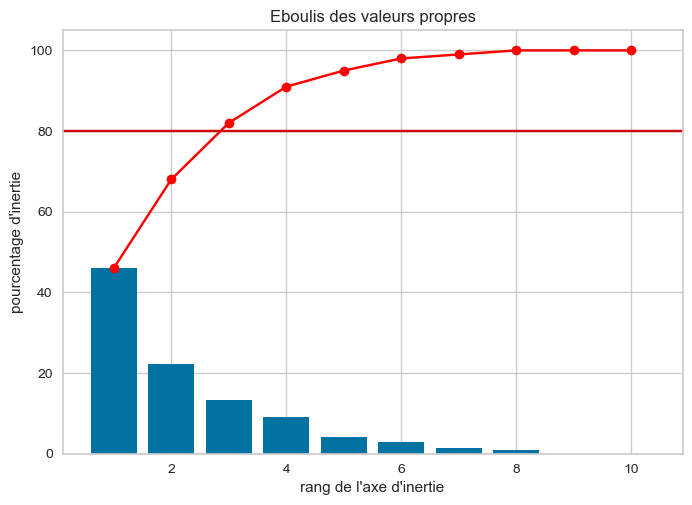

In [108]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")

#Ligné à 80%
plt.axhline(y=80,color="r")

plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [109]:
n_components = 3
pca = PCA(n_components)

x_list = range(1, n_components+1)

pca.fit(X_scaled)

pcs= pca.components_

pcs= pd.DataFrame(pcs)


In [110]:
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,auto_suffisance,Population totale,PIB,Stabilité politique,dependance_import
F1,0.43,0.33,0.15,0.42,0.42,0.17,0.34,0.35,-0.10,-0.22
F2,0.20,0.25,0.21,0.21,0.20,-0.51,-0.30,-0.10,0.37,0.53
F3,-0.15,-0.24,0.69,-0.15,-0.22,-0.25,0.34,0.41,-0.07,0.13


In [111]:
df = pcs.T

In [112]:
df.sort_values(by = ['F3'], ascending = False)[['F3']]

,F3
Importations - Quantité,0.692012
PIB,0.409740
Population totale,0.342800
dependance_import,0.130613
Stabilité politique,-0.074630
Disponibilité intérieure,-0.150120
Nourriture,-0.152904
Production,-0.220507
Exportations - Quantité,-0.241683
auto_suffisance,-0.245238


In [113]:
#df.sort_values(by = ['F4'], ascending = False)[['F4']]

<AxesSubplot:>

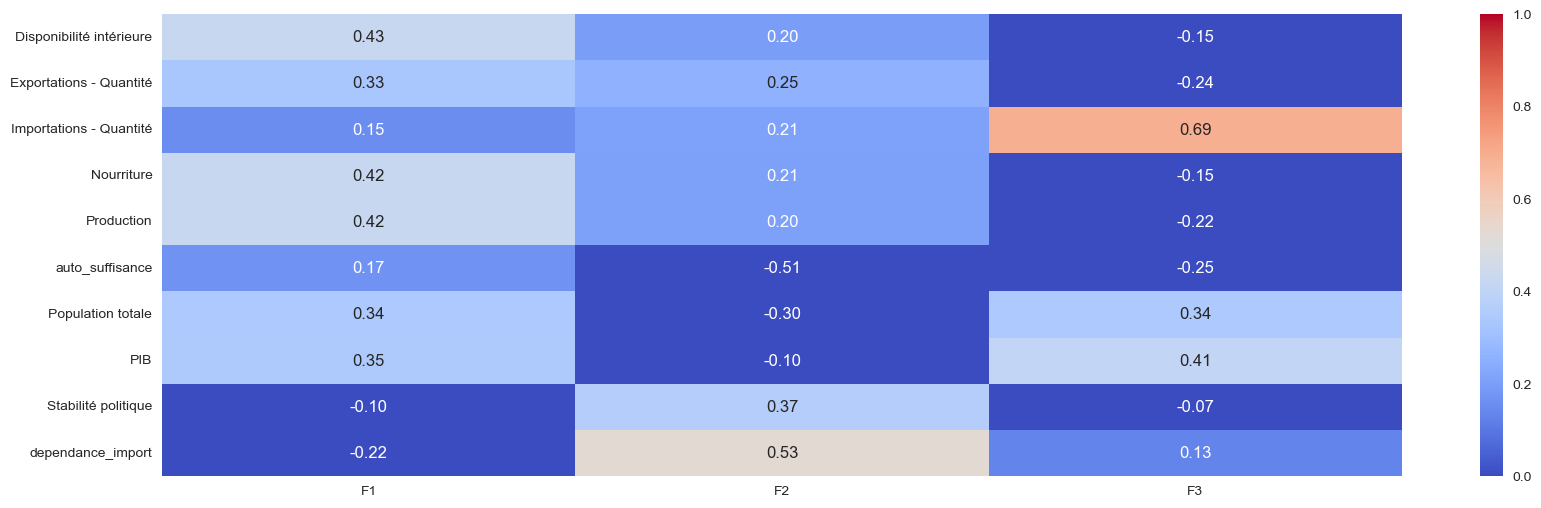

In [114]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=0, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [115]:
x, y = 0,1

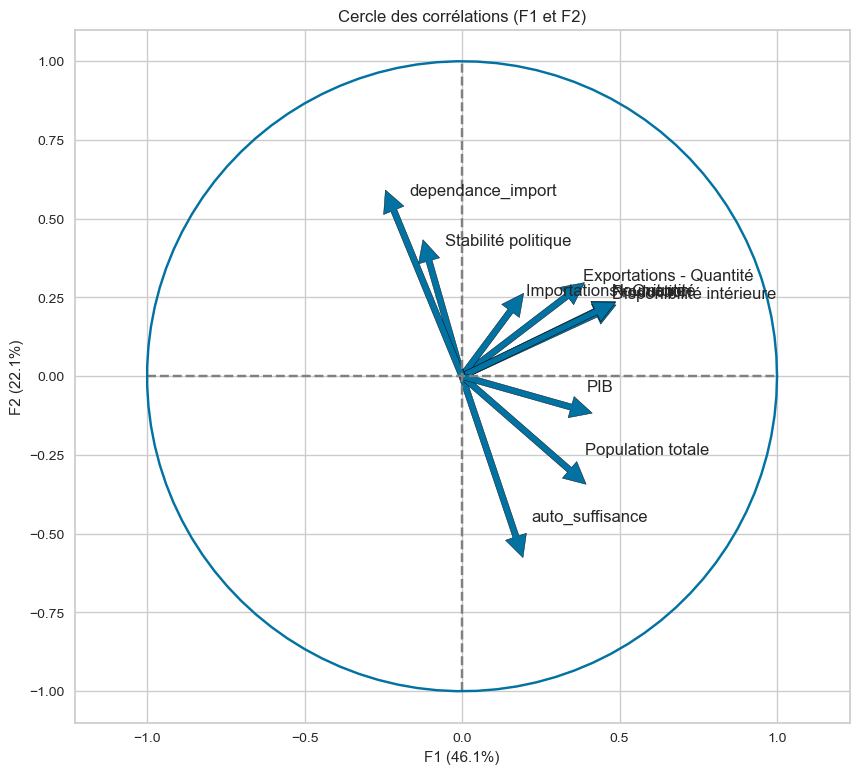

In [116]:
fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)

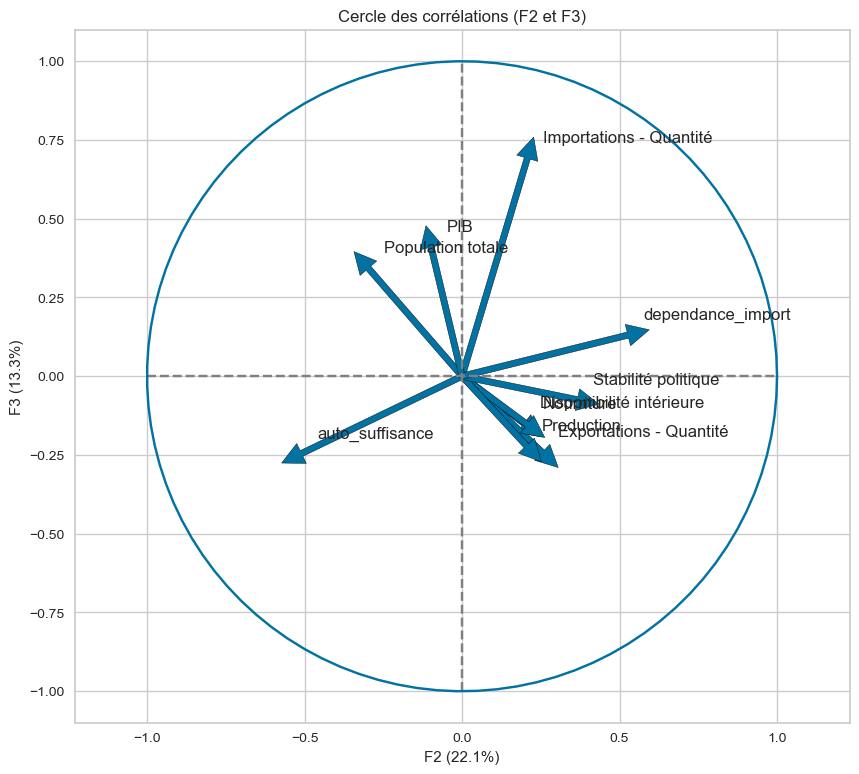

In [117]:
x, y = 1,2

fig, ax = plt.subplots(figsize=(10, 9))
for i in range(0, pca.components_.shape[1]):
    ax.arrow(0,
             0,  # Start the arrow at the origin
             pca.components_[x, i],  #0 for PC1
             pca.components_[y, i],  #1 for PC2
             head_width=0.07,
             head_length=0.07, 
             width=0.02,              )

    plt.text(pca.components_[x, i] + 0.05,
             pca.components_[y, i] + 0.05,
             features[i])
    
# affichage des lignes horizontales et verticales
plt.plot([-1, 1], [0, 0], color='grey', ls='--')
plt.plot([0, 0], [-1, 1], color='grey', ls='--')


# nom des axes, avec le pourcentage d'inertie expliqué
plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))


an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale
plt.axis('equal')
plt.show(block=False)##

In [118]:
X_proj = pca.transform(X_scaled)

In [119]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        # j'ai copié collé la fonction sans la lire
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()

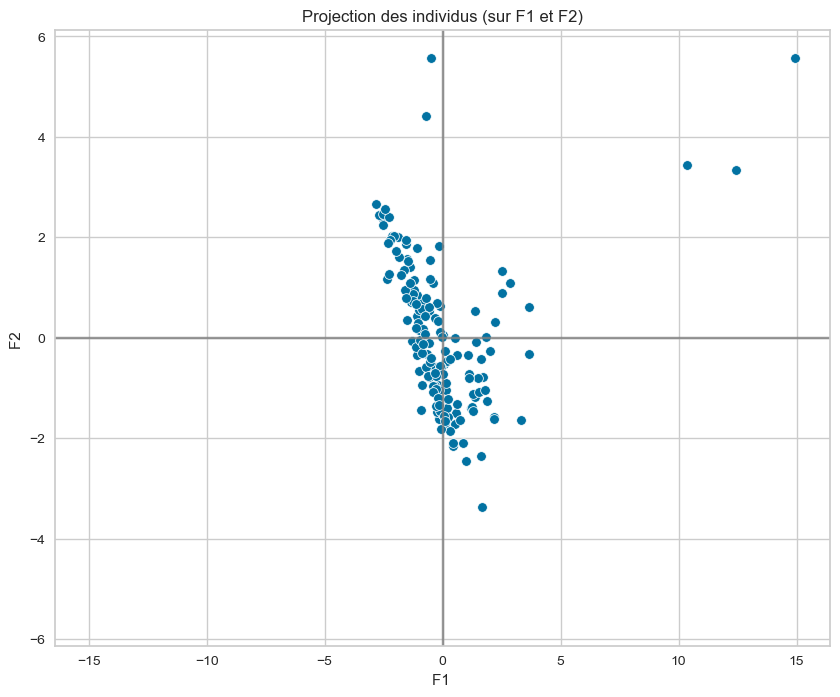

In [120]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y)

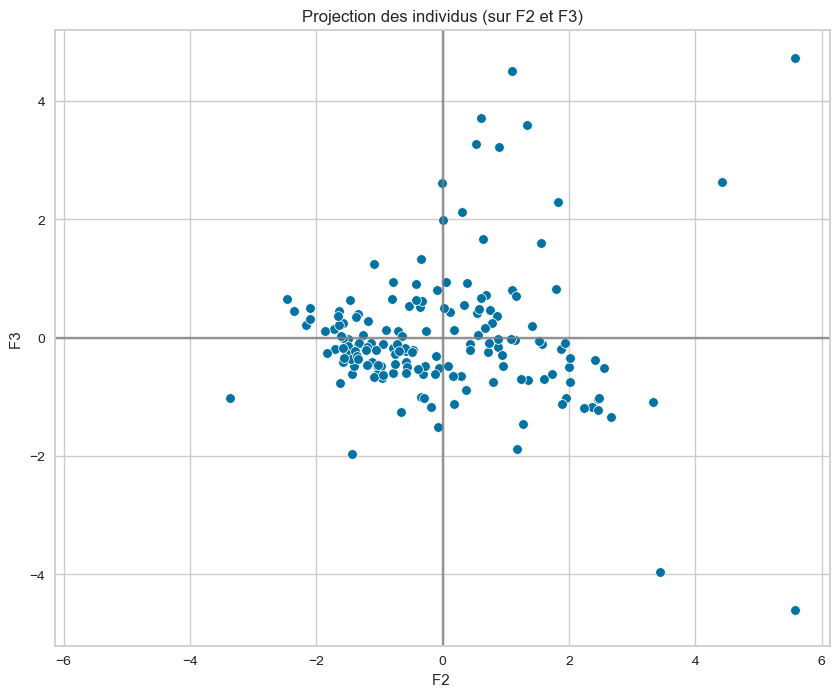

In [121]:
x_y = [1,2]
display_factorial_planes(X_proj, x_y)

# Réduction des dimensions

In [122]:
pca = PCA(n_components = 3)

x_list = range(1, n_components+1)

pca.fit(X_scaled)

pcs_4 = pca.components_

pcs_4 = pd.DataFrame(pcs_4)

pcs_4.columns = features
pcs_4.index = [f"F{i}" for i in x_list]
pcs_4.round(2)

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,auto_suffisance,Population totale,PIB,Stabilité politique,dependance_import
F1,0.43,0.33,0.15,0.42,0.42,0.17,0.34,0.35,-0.10,-0.22
F2,0.20,0.25,0.21,0.21,0.20,-0.51,-0.30,-0.10,0.37,0.53
F3,-0.15,-0.24,0.69,-0.15,-0.22,-0.25,0.34,0.41,-0.07,0.13


# Clustering : test

In [123]:
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# K-means

In [124]:
from sklearn.cluster import KMeans

In [125]:
nb_cluster = 3

# Une liste vide pour enregistrer les inerties :  
intertia_list = [ ]

# Notre liste de nombres de clusters : 
k_list = range(1, 10)

# Pour chaque nombre de clusters : 
for k in k_list : 
    
    # On instancie un k-means pour k clusters
    kmeans = KMeans(n_clusters=k)
    
    # On entraine
    kmeans.fit(X_scaled)
    
    # On enregistre l'inertie obtenue : 
    intertia_list.append(kmeans.inertia_)

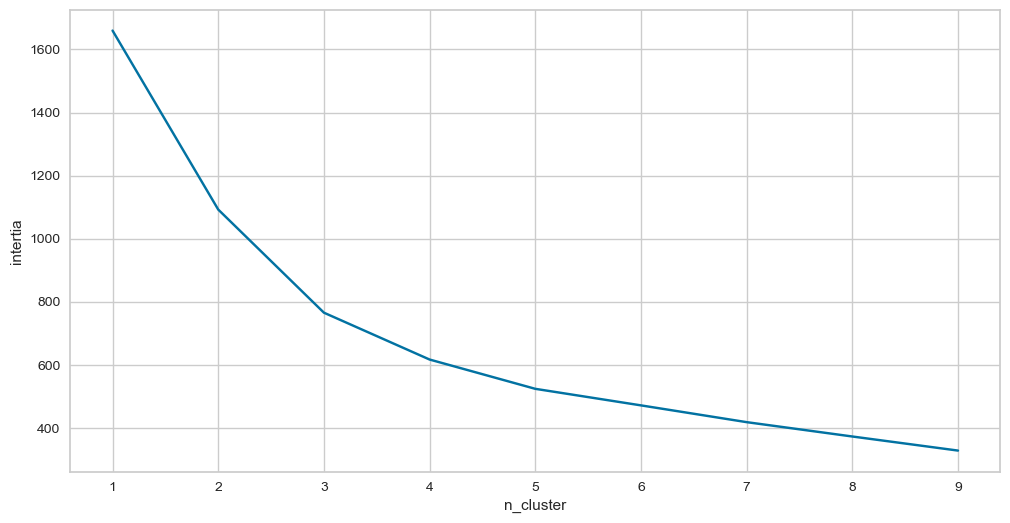

In [126]:
fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.set_ylabel("intertia")
ax.set_xlabel("n_cluster")

ax = plt.plot(k_list, intertia_list)

In [127]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import KElbowVisualizer

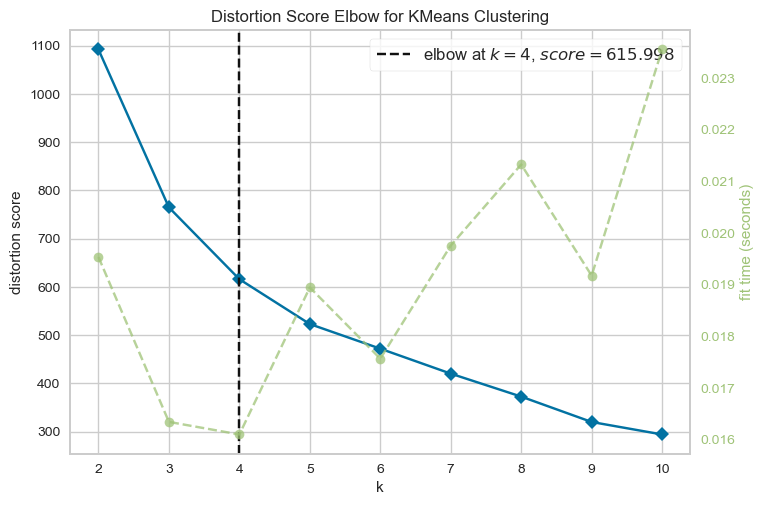

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [128]:
# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model)

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [129]:
k = 4

In [130]:
kmeans = KMeans(n_clusters=k)

In [131]:
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

In [132]:
kmeans.inertia_

615.7159888832408

In [133]:
intertia = []

In [134]:
k_list = range(1, 10)
list(k_list)

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [135]:
for i in k_list :
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(X_scaled) 
  intertia.append(kmeans.inertia_)

In [136]:
intertia

[1659.9999999999995,
 1092.018753044356,
 764.744145936141,
 615.7159888832408,
 523.0763240939727,
 470.559020023273,
 416.46251467719173,
 365.57423919122584,
 330.76928352019627]

In [137]:
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_scaled)

KMeans(n_clusters=4)

In [138]:
kmeans.labels_

array([1, 3, 0, 1, 3, 1, 0, 3, 1, 0, 1, 0, 1, 0, 1, 0, 3, 1, 1, 1, 0, 2,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 3, 0, 2, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 1, 3, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 3, 0, 0, 1, 1, 1, 3, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 3, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 3, 1, 2, 1, 0])

In [139]:
df_kmeans = pd.DataFrame({"Pays" : zone, "cluster" : kmeans.labels_})
df_kmeans.head()

,Pays,cluster
0,Afghanistan,1
1,Afrique du Sud,3
2,Albanie,0
3,Algérie,1
4,Allemagne,3


In [140]:
data_kmeans = df_X
data_kmeans["cluster"] = kmeans.labels_
data_kmeans.head()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,auto_suffisance,Population totale,PIB,Stabilité politique,dependance_import,cluster
Zone,,,,,,,,,,,
Afghanistan,-0.290240,-0.218241,-0.315574,-0.283608,-0.277173,-0.361001,0.766019,-0.426959,-3.027881,0.111760,1
Afrique du Sud,0.644273,-0.079234,2.324924,0.635441,0.376126,0.176565,0.997224,0.938329,-0.233222,-0.426539,3
Albanie,-0.294774,-0.218241,-0.266575,-0.287322,-0.283152,-0.808813,-0.535842,-0.597226,0.498712,0.650059,0
Algérie,-0.190486,-0.218241,-0.462571,-0.186598,-0.178720,0.664824,0.833602,0.572571,-0.942977,-0.887938,1
Allemagne,0.472424,1.207139,4.110663,0.437706,0.315141,-0.302449,1.185745,1.972543,0.731600,0.092535,3


In [141]:
for i in range(0, k) : 
    # on fait une selection
    sub_df = df_kmeans.loc[df_kmeans.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms et les themes de chaque ligne
    names_list = sub_df.Pays.values

    # on créé une liste de couple nom/theme
    ziped = zip(names_list) 
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")

cluster : 0
('Albanie',) / ('Antigua-et-Barbuda',) / ('Arménie',) / ('Autriche',) / ('Bahamas',) / ('Barbade',) / ('Botswana',) / ('Bulgarie',) / ('Bénin',) / ('Cabo Verde',) / ('Chine - RAS de Macao',) / ('Chypre',) / ('Congo',) / ('Cuba',) / ('Danemark',) / ('Dominique',) / ('Estonie',) / ('Eswatini',) / ('Fidji',) / ('Gabon',) / ('Gambie',) / ('Grenade',) / ('Guinée',) / ('Guinée-Bissau',) / ('Géorgie',) / ('Haïti',) / ('Irlande',) / ('Islande',) / ('Kirghizistan',) / ('Kiribati',) / ('Koweït',) / ('Lesotho',) / ('Lettonie',) / ('Libéria',) / ('Lituanie',) / ('Luxembourg',) / ('Macédoine du Nord',) / ('Malte',) / ('Mauritanie',) / ('Mongolie',) / ('Monténégro',) / ('Namibie',) / ('Nouvelle-Calédonie',) / ('Oman',) / ('Polynésie française',) / ('Saint-Kitts-et-Nevis',) / ('Saint-Vincent-et-les Grenadines',) / ('Sainte-Lucie',) / ('Samoa',) / ('Sao Tomé-et-Principe',) / ('Sierra Leone',) / ('Slovaquie',) / ('Slovénie',) / ('Suriname',) / ('Tadjikistan',) / ('Timor-Leste',) / ('Trinité

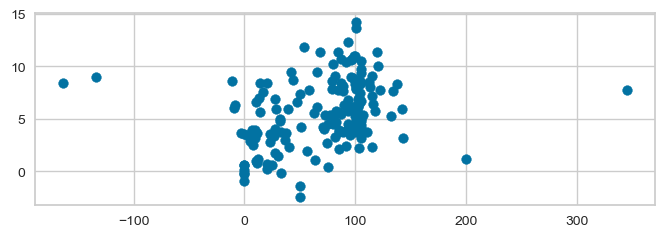

In [142]:
nombre_de_categories = k

centers = pd.DataFrame(kmeans.cluster_centers_) # Récupérer les centres pour les afficher
centers.columns = features

plt.subplot(211)

plt.scatter(data.auto_suffisance,data.PIB)

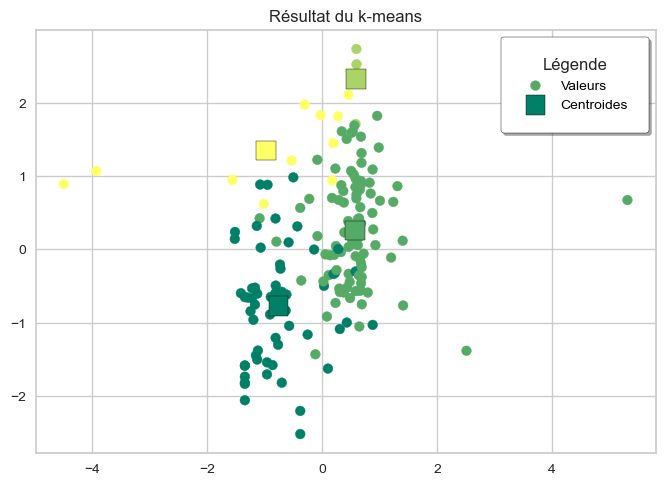

In [143]:
plt.subplot() ; plt.title("Résultat du k-means")

Valeurs = plt.scatter(df_X.auto_suffisance,df_X.PIB,

         c=list(kmeans.predict(X_scaled)),cmap='summer',label = 'Valeurs') ;


Centroides = plt.scatter(centers.auto_suffisance,centers.PIB,c=range(nombre_de_categories),s=200,marker="s",cmap='summer',
            edgecolor = 'black',label = 'Centroides')

plt.legend(loc = 'upper right',labelcolor = 'black',edgecolor = 'black',title = 'Légende', borderpad = 1.5, 
           frameon = True, shadow = True,fancybox = True, facecolor = 'white')

plt.show()

In [144]:
pivot_kmeans = pd.pivot_table(data_kmeans, values=data_kmeans.columns, columns=['cluster'], aggfunc=np.mean)

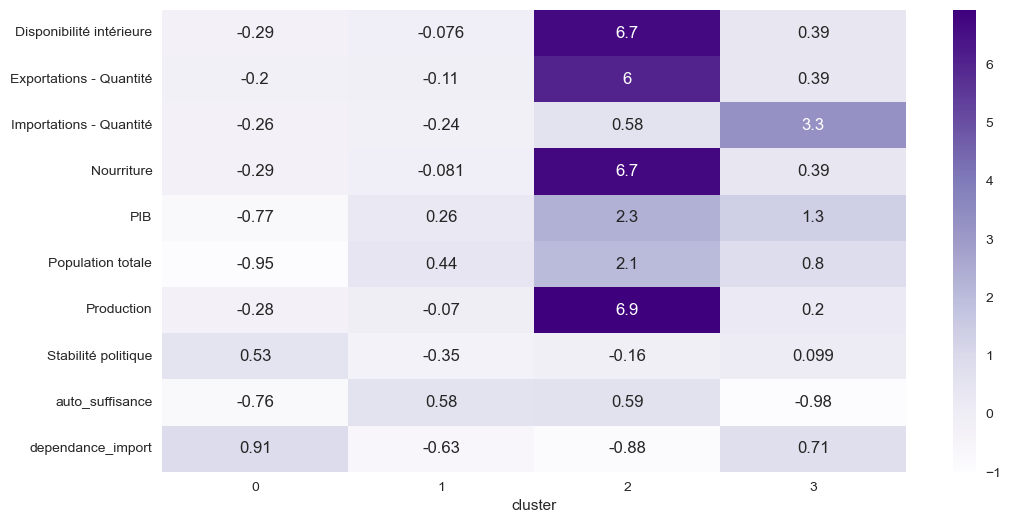

In [145]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.heatmap(pivot_kmeans,vmin=-1, annot=True, cmap="Purples")

# Clustering : classification ascendante hiérarchique

In [146]:
from sklearn.cluster import AgglomerativeClustering

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [147]:
Z = linkage(X_scaled, method="ward")
pd.DataFrame(Z)

,0,1,2,3
0,27.0,158.0,0.205301,2.0
1,107.0,109.0,0.218112,2.0
2,102.0,143.0,0.274520,2.0
3,137.0,162.0,0.280314,2.0
4,87.0,125.0,0.282118,2.0
...,...,...,...,...
160,313.0,321.0,11.266688,56.0
161,322.0,324.0,12.606564,97.0
162,325.0,326.0,19.066547,66.0
163,327.0,328.0,23.367342,163.0


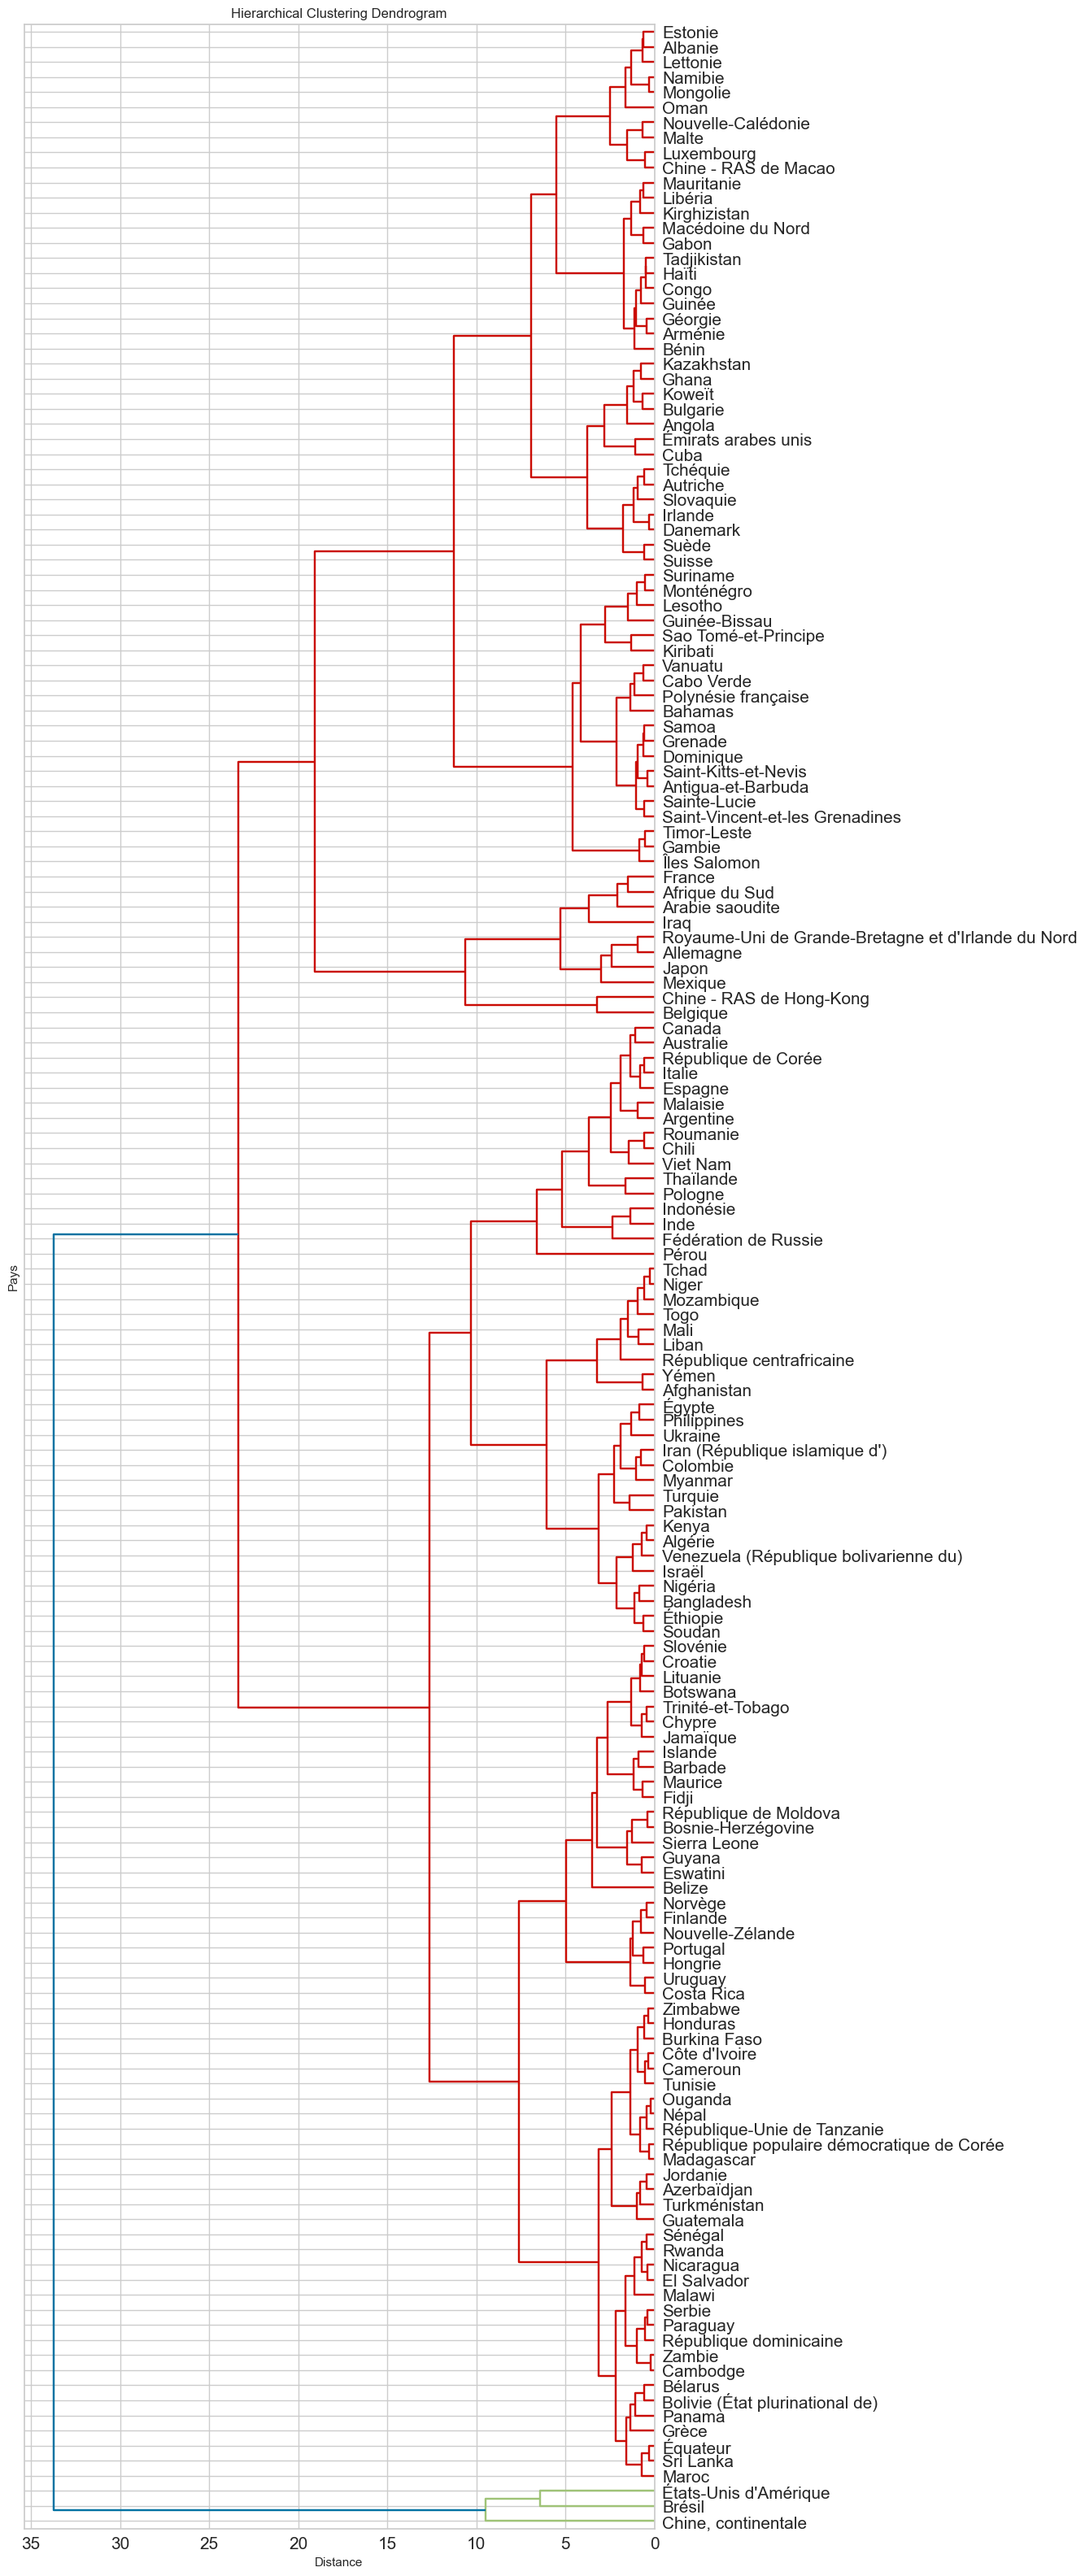

In [148]:
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=zone, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Pays")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

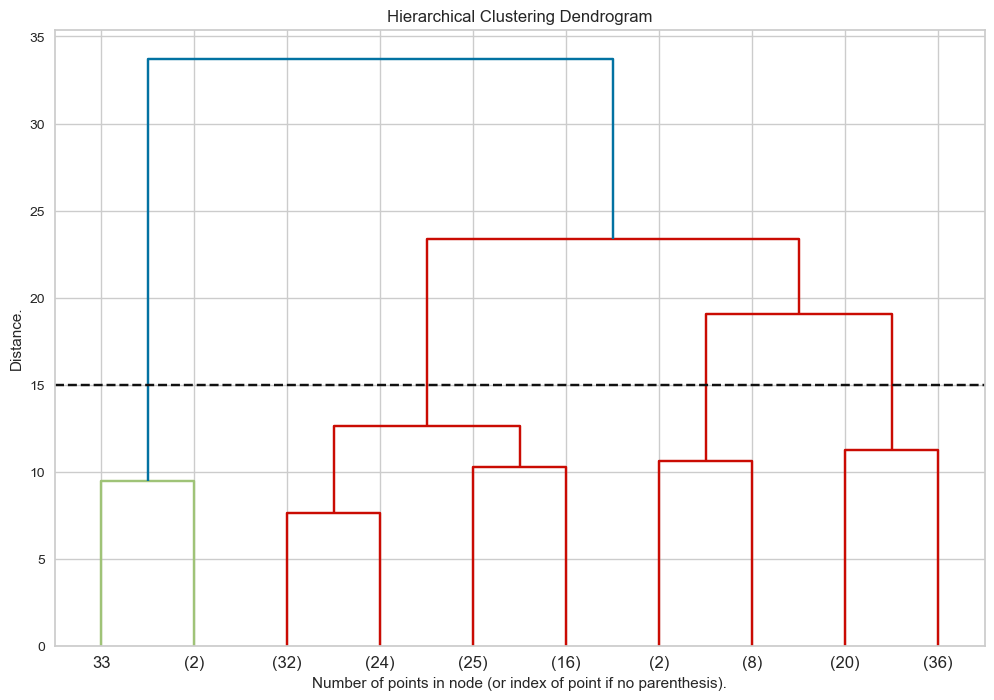

In [149]:
# les arguments p=10, truncate_mode="lastp" signifient que l'on ne va afficher que 10 clusters

fig, ax = plt.subplots(1, 1, figsize=(12, 8))

_ = dendrogram(Z, p=10, truncate_mode="lastp", ax=ax)

plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")

plt.axhline(15, color='k', ls='--');

plt.show()

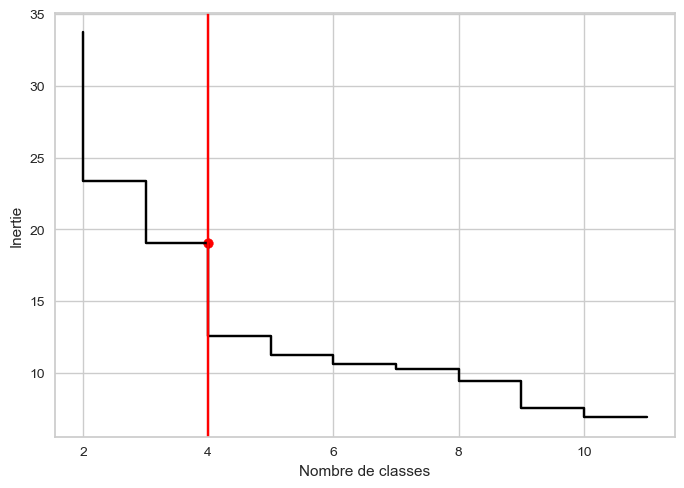

In [150]:
last = Z[-10:, 2]

last_rev = last[::-1]

idxs = np.arange(2, len(last) + 2)

plt.step(idxs, last_rev, c="black")

plt.xlabel("Nombre de classes")

plt.ylabel("Inertie")

nombre = 4

plt.scatter(idxs[np.where(idxs==nombre)], last_rev[np.where(idxs==nombre)], c="red")

plt.axvline(idxs[np.where(idxs==nombre)], c="red")

plt.show()

In [151]:
k = 4
cah = AgglomerativeClustering(n_clusters=k, linkage="ward")

In [152]:
cah.fit(X_scaled)

AgglomerativeClustering(n_clusters=4)

In [153]:
cah.labels_

array([0, 1, 2, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 3,
       2, 0, 0, 2, 2, 0, 0, 0, 0, 1, 2, 3, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0,
       0, 2, 0, 0, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 0, 1, 0, 2, 0, 2, 2, 2, 2, 2, 0, 2, 0, 2, 2, 0,
       0, 0, 0, 2, 0, 0, 2, 1, 2, 2, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       0, 0, 2, 0, 0, 0, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0,
       2, 0, 0, 0, 0, 0, 0, 2, 0, 3, 0, 2], dtype=int64)

In [154]:
df_cah = pd.DataFrame({"Pays" : zone, "cluster" : cah.labels_})
df_cah.head()

,Pays,cluster
0,Afghanistan,0
1,Afrique du Sud,1
2,Albanie,2
3,Algérie,0
4,Allemagne,1


In [155]:
data_cah = df_X
data_cah["cluster"] = cah.labels_
data_cah.head()

,Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Production,auto_suffisance,Population totale,PIB,Stabilité politique,dependance_import,cluster
Zone,,,,,,,,,,,
Afghanistan,-0.290240,-0.218241,-0.315574,-0.283608,-0.277173,-0.361001,0.766019,-0.426959,-3.027881,0.111760,0
Afrique du Sud,0.644273,-0.079234,2.324924,0.635441,0.376126,0.176565,0.997224,0.938329,-0.233222,-0.426539,1
Albanie,-0.294774,-0.218241,-0.266575,-0.287322,-0.283152,-0.808813,-0.535842,-0.597226,0.498712,0.650059,2
Algérie,-0.190486,-0.218241,-0.462571,-0.186598,-0.178720,0.664824,0.833602,0.572571,-0.942977,-0.887938,0
Allemagne,0.472424,1.207139,4.110663,0.437706,0.315141,-0.302449,1.185745,1.972543,0.731600,0.092535,1


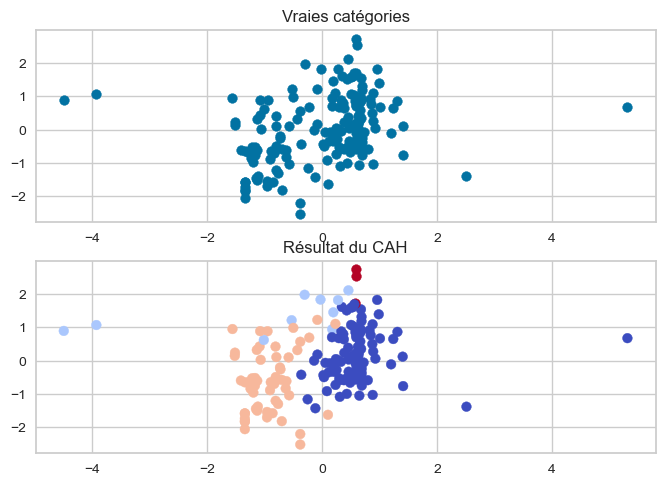

In [156]:
#iris["species"] = iris["species"].astype('category') 

plt.subplot(211) ; plt.title("Vraies catégories")

plt.scatter(data_cah.auto_suffisance,data_cah.PIB) ;

# Affichage des résultats du k-means

plt.subplot(212) ; plt.title("Résultat du CAH")

plt.scatter(data_cah.auto_suffisance, data_cah.PIB, c=data_cah.cluster, cmap='coolwarm')

plt.show()

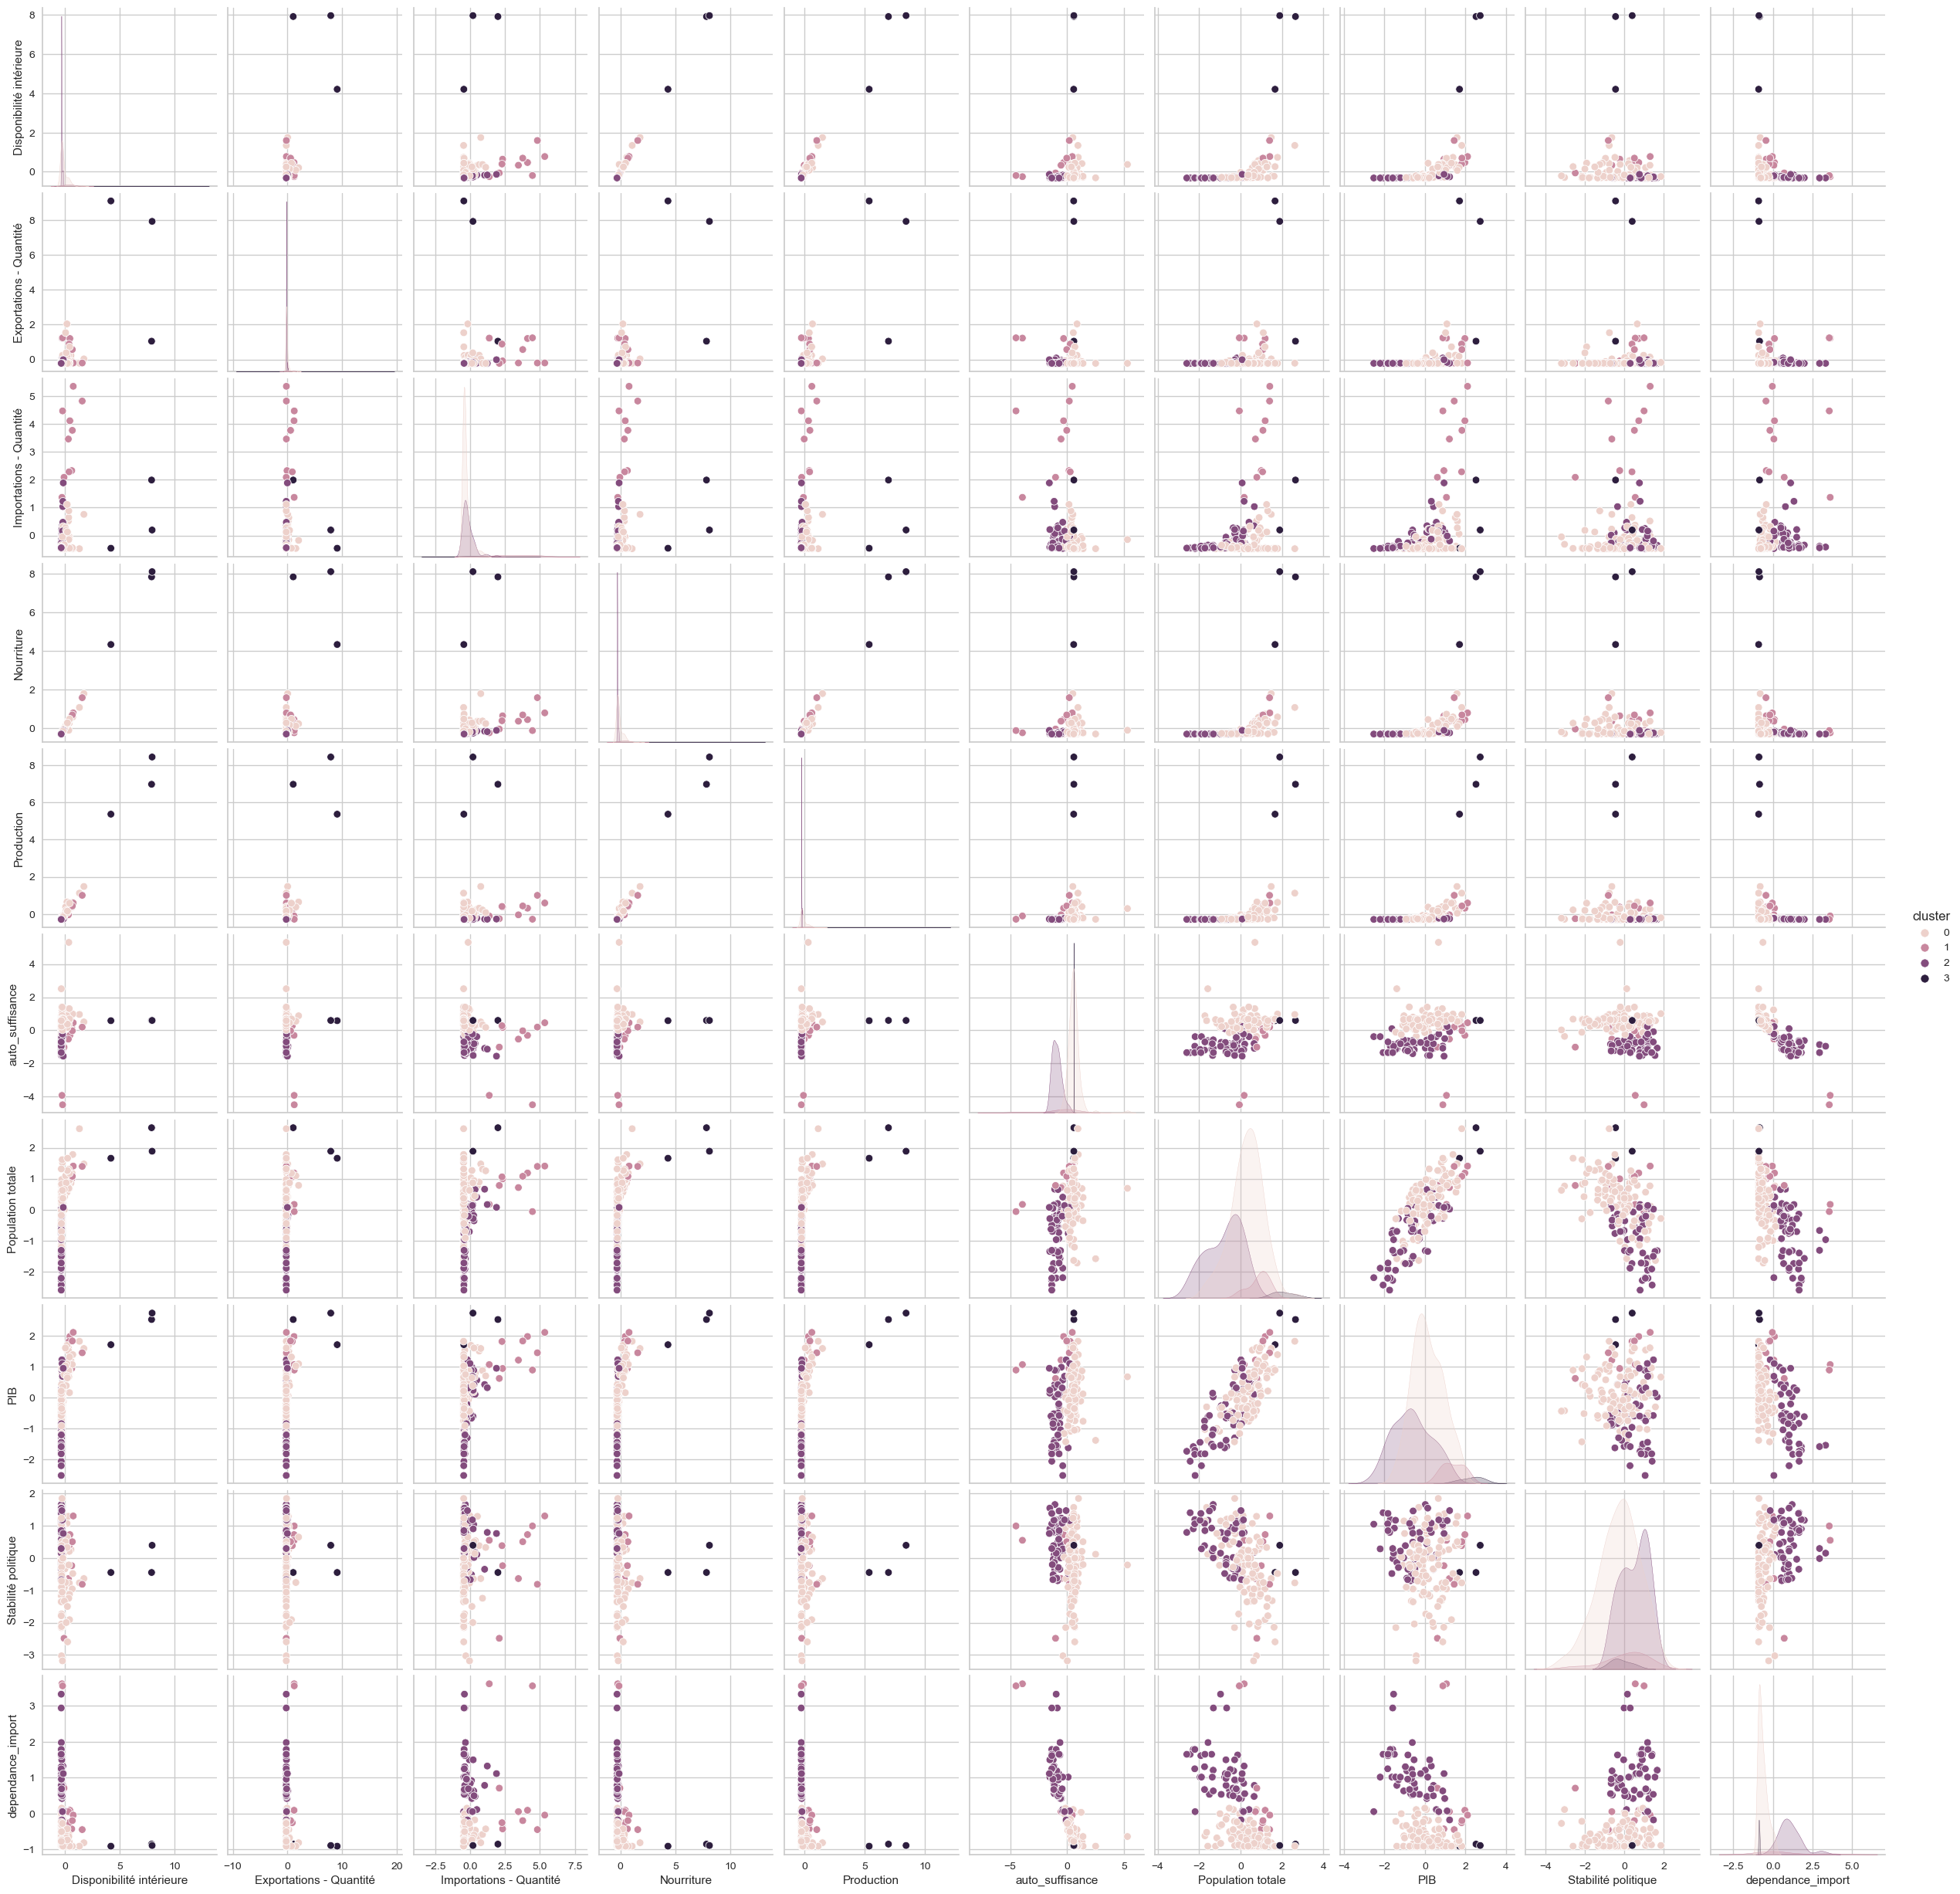

In [157]:
sns.pairplot(data_cah, hue="cluster")

In [158]:
for i in range(0, k) : 
    # on fait une selection
    sub_df = data_cah.loc[data_cah.cluster == i]

    # le cluster en question
    print(f"cluster : {i}")

    # on extrait les noms et les themes de chaque ligne
    names_list = sub_df.index.values

    # on créé une liste de couple nom/theme
    ziped = zip(names_list) 
    txt = [f"{n}" for n in ziped]

    # on transforme en str
    txt = " / ".join(txt)
 
    # on print
    print(txt)
    print("\n\n")

cluster : 0
('Afghanistan',) / ('Algérie',) / ('Argentine',) / ('Australie',) / ('Azerbaïdjan',) / ('Bangladesh',) / ('Barbade',) / ('Belize',) / ('Bolivie (État plurinational de)',) / ('Bosnie-Herzégovine',) / ('Botswana',) / ('Burkina Faso',) / ('Bélarus',) / ('Cambodge',) / ('Cameroun',) / ('Canada',) / ('Chili',) / ('Chypre',) / ('Colombie',) / ('Costa Rica',) / ('Croatie',) / ("Côte d'Ivoire",) / ('El Salvador',) / ('Espagne',) / ('Eswatini',) / ('Fidji',) / ('Finlande',) / ('Fédération de Russie',) / ('Grèce',) / ('Guatemala',) / ('Guyana',) / ('Honduras',) / ('Hongrie',) / ('Inde',) / ('Indonésie',) / ("Iran (République islamique d')",) / ('Islande',) / ('Israël',) / ('Italie',) / ('Jamaïque',) / ('Jordanie',) / ('Kenya',) / ('Liban',) / ('Lituanie',) / ('Madagascar',) / ('Malaisie',) / ('Malawi',) / ('Mali',) / ('Maroc',) / ('Maurice',) / ('Mozambique',) / ('Myanmar',) / ('Nicaragua',) / ('Niger',) / ('Nigéria',) / ('Norvège',) / ('Nouvelle-Zélande',) / ('Népal',) / ('Ouganda',

In [159]:
pivot = pd.pivot_table(data_cah, values=data_cah.columns, columns=['cluster'], aggfunc=np.mean)

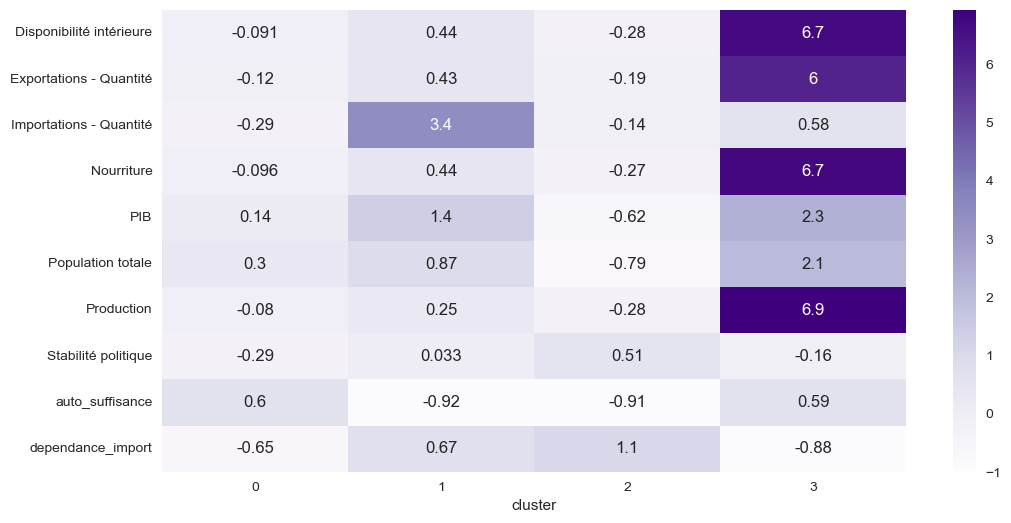

In [160]:
#Heatmap des clusters de la CAH
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.heatmap(pivot,vmin=-1, annot=True, cmap="Purples")

# Comparaison Heatmap

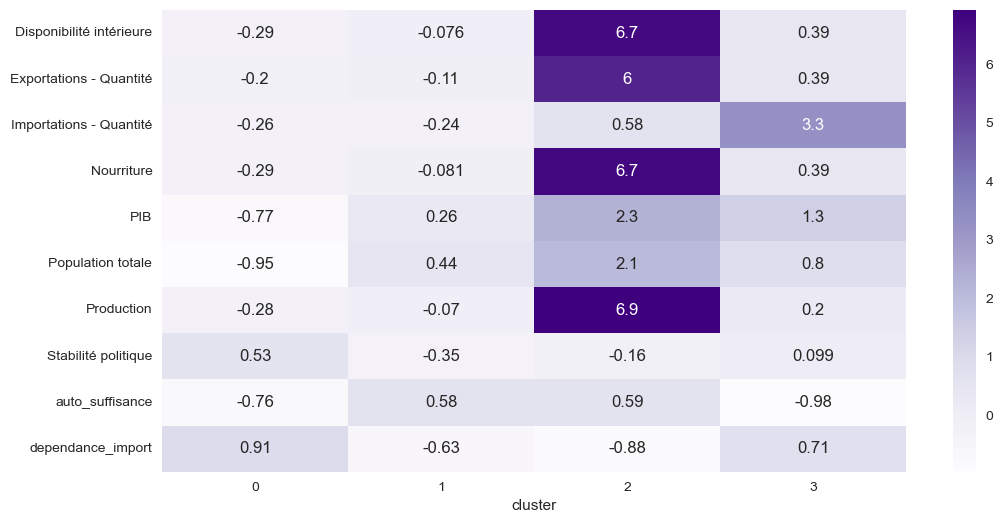

In [161]:
#Heatmap des clusters Kmeans
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.heatmap(pivot_kmeans, annot=True, cmap="Purples")

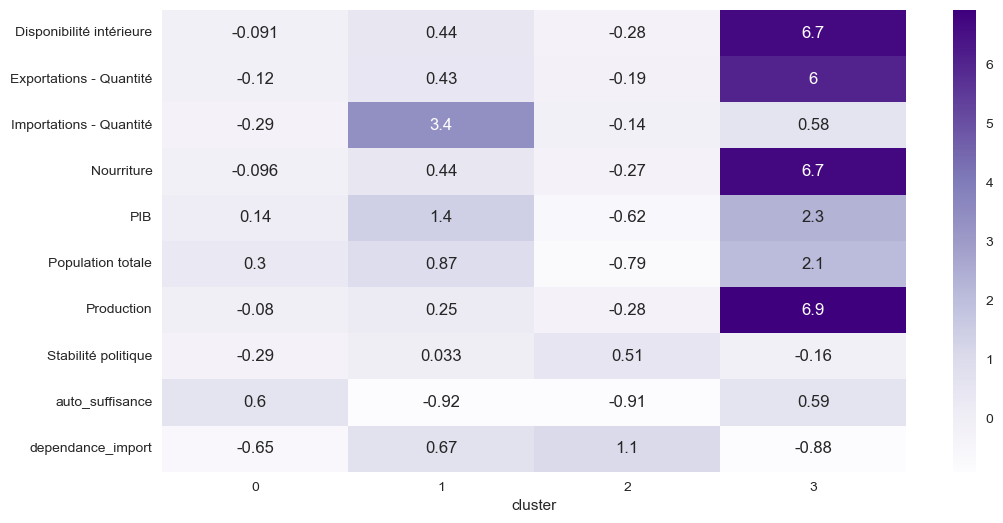

In [162]:
#Heatmap des clusters de la CAH
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.heatmap(pivot, annot=True, cmap="Purples")

In [170]:
df_cah['kmean'] = df_kmeans['cluster']
df_cah

,Pays,cluster,kmean
0,Afghanistan,0,1
1,Afrique du Sud,1,3
2,Albanie,2,0
3,Algérie,0,1
4,Allemagne,1,3
...,...,...,...
161,Émirats arabes unis,2,3
162,Équateur,0,1
163,États-Unis d'Amérique,3,2
164,Éthiopie,0,1


In [174]:
pays_choisi = df_cah.loc[(df_cah["cluster"] == 2) & (df_cah["kmean"] == 0 )]

In [176]:
liste_pays = ', '.join(pays_choisi['Pays'])

In [177]:
liste_pays

'Albanie, Antigua-et-Barbuda, Arménie, Autriche, Bahamas, Bulgarie, Bénin, Cabo Verde, Chine - RAS de Macao, Congo, Cuba, Danemark, Dominique, Estonie, Gabon, Gambie, Grenade, Guinée, Guinée-Bissau, Géorgie, Haïti, Irlande, Kirghizistan, Kiribati, Koweït, Lesotho, Lettonie, Libéria, Luxembourg, Macédoine du Nord, Malte, Mauritanie, Mongolie, Monténégro, Namibie, Nouvelle-Calédonie, Oman, Polynésie française, Saint-Kitts-et-Nevis, Saint-Vincent-et-les Grenadines, Sainte-Lucie, Samoa, Sao Tomé-et-Principe, Slovaquie, Suriname, Tadjikistan, Timor-Leste, Vanuatu, Îles Salomon'